# Introduction

Plotly est une bibliothèque Python puissante dédiée à la science des données, à l'apprentissage automatique, ainsi qu’aux opérations liées à l'intelligence artificielle. Vous pouvez utiliser Plotly en ligne, hors ligne et dans des Notebooks Jupyter. Cette librairie permet de créer des visualisations extrêmement puissantes et interactives avec des données.

La bibliothèque graphique Python de Plotly permet de générer des graphiques interactifs de qualité publiable dans des journaux ou sur des sites etc. Comme exemples de création, on peut trouver les tracés linéaires, les nuages de points, les diagrammes en aires, les diagrammes à barres, à barres d'erreur, les diagrammes en boîte, les histogrammes, les cartes thermiques, les sous-tracés,  les axes multiples, les graphiques polaires ou encore les graphiques à bulles.

**Conditions préalables** 

Vous devrez installer certains packages ci-dessous:
<font color='purple'>
* numpy
* pandas
* matplotlib
* pillow
* wordcloud <font color='black'>(Effectuer une analyse exploratoire des données pour le traitement du langage naturel à l'aide de Word Cloud en Python)

<font color='black'>    
La bibliothèque **numpy** est l'une des bibliothèques les plus populaires et les plus utiles qui est utilisée pour gérer les matrices et tableaux multidimensionnels. Elle est également utilisée en combinaison avec la bibliothèque **Pandas** pour effectuer une analyse des données.
Le module **Python os** est une bibliothèque intégrée, vous n'avez donc pas à l'installer.
Pour la visualisation, **matplotlib** est une bibliothèque de base qui permet à de nombreuses autres bibliothèques de s'exécuter et de tracer sur sa base, y compris **seaborn** ou **wordcloud**, que vous utiliserez dans ce tutoriel. La bibliothèque **pillow** est un package qui permet la lecture d'images. Il s'agit d'un wrapper pour PIL - Python Imaging Library. Vous aurez besoin de cette bibliothèque pour lire l'image comme masque pour le wordcloud (nuage de mots)
**wordcloud** peut être un peu difficile à installer. Si vous n'en avez besoin que pour tracer un wordcloud de base, alors pip install wordcloud ou conda install -c conda-forge wordcloud sera suffisant.
    

**Je vous propose de créer un  nouvel environnement conda :**  
`conda create --name plotly`  
Puis d'activer cet environnement   
`conda activate plotly`  

Puis installer les paquets manquant :  
`conda install -c anaconda numpy`  
`conda install -c anaconda pandas`  
`conda install -c anaconda matplotlib`  
`conda install -c anaconda pillow`  
`conda install -c conda-forge wordcloud`  
`conda install -c anaconda plotly`  

vérifier les paquets existant :   
`conda list`  

Nous allons utiliser le jeux de données World University Rankings
Vous pouvez acceder à la description de ce jeux de données ici : 
https://www.kaggle.com/mylesoneill/world-university-rankings    

### <br>**Sommaire** :
1. [Chargement des données et explication des fonctionnalités](#1)
1. [Line Charts](#2)
1. [Scatter Charts](#3)
1. [Bar Charts](#4)
1. [Pie Charts](#5)
1. [Bubble Charts](#6)
1. [Histogram](#7)
1. [Word Cloud](#8)
1. [Box Plot](#9)
1. [Scatter Plot Matrix](#10)
1. [Inset Plots](#11)
1. [3D Scatter Plot with Colorscaling](#12)
1. [Multiple Subplots](#13)

**Documentation**  
* https://plotly.com/python-api-reference/
* https://plotly.com/python/

In [2]:
import numpy as np # algèbre linéaire
import pandas as pd # procès de données, CSV file I/O (e.g. pd.read_csv)

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# librairie word cloud
from wordcloud import WordCloud

# librairie matplotlib
import matplotlib.pyplot as plt



## Connection d'un drive

In [3]:
#from google.colab import drive
#drive.mount('/content/drive/')

#!pip install --upgrade plotly
#!pip install jupyter-dash

# Permet d'afficher les données disponibles dans le répertoire data
import os
print(os.listdir(".")) 
os.chdir("/content/drive/MyDrive/Colab Notebooks")

print(os.listdir())


ModuleNotFoundError: No module named 'google.colab'

<a id="1"></a> <br>
<font color='purple'>
## 1. Chargement des données et explication des fonctionnalités

<font color='black'>
    
**timesData.csv** comprend 14 fonctionnalités qui sont:   
* **world_rank** : classement mondial de l'université. Contient des plages de rangs et des rangs égaux (par exemple = 94 et 201-250)  
* **university_name** : nom de l'université  
* **country** : pays de chaque université  
* **teaching** : score universitaire pour l'enseignement (l'environnement d'apprentissage)  
* **international** : score universitaire des perspectives internationales (personnel, étudiants, recherche)  
* **research** : score universitaire pour la recherche (volume, revenu et réputation)  
* **citations** : score universitaire pour les citations (influence de la recherche)  
* **income** : score universitaire pour le revenu de l'industrie (transfert de connaissances)  
* **total_score** : score total pour l'université, utilisé pour déterminer le rang  
* **num_students** : nombre d'étudiants à l'université  
* **student_staff_ratio** : nombre d'étudiants divisé par le nombre d'employés  
* **international_students** : Pourcentage d'étudiants internationaux  
* **female_male_ratio** : Ratio étudiant féminin / étudiant masculin  
* **year** : année du classement (2011 à 2016 inclus)  

In [4]:
# Chargement des données qui seront utilisées.
timesData = pd.read_csv("timesData.csv")

In [3]:
# information about timesData
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [4]:
timesData.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


<a id="2"></a> <br>
<font color='purple'>
## 2. Line Charts
    
<font color='black'>    
Exemple de graphiques linéaires : citation et enseignement comparé au classement mondial des 100 meilleures universités

 * Importe les objets graph via "go"
 * Création de traces 
     * x : axe x 
     * y : axe y 
     * mode: type de tracé comme marqueur, ligne ou ligne + marqueurs 
     * name : nom des plots 
     * marker : marker est utilisé comme un dictionnaire. 
         * color : couleur des lignes. Il faut du RVB (rouge, vert, bleu) et l'opacité (alpha) 
     * text : Le texte du survol (le survol est un curseur) 
 * data : est une liste à laquelle nous ajoutons des traces 
 * layout : c'est un dictionnaire. 
     * title : titre de la mise en page 
     * x axis : c'est le dictionnaire 
         * title : étiquette de l'axe des x 
         * ticklen : longueur des marques ou des graduations de l'axe x 
         * zeroline : montrant zéro ligne ou non 
 * fig : il comprend les données et la mise en page 
 * iplot() : trace la figure (fig) créée par les données et la disposition

In [4]:
# Prépare les trames de données (data frame)
df = timesData.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# Création de la trame 1
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines+markers",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text = df.university_name)
# Création de la trame 2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "enseignement",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text = df.university_name)

data = [trace1, trace2]
layout = dict(title = 'Citation et enseignement comparé au classement mondial des 100 meilleures universités',
              xaxis = dict(title = 'Rang Mondial',ticklen = 5,zeroline= False)
)
fig = dict(data = data, layout = layout)
iplot(fig)

<a id="3"></a> <br>
<font color='purple'>
## 3. Scatter

<font color='black'>
Exemple de dispersion: Citation par rapport au classement mondial des 100 meilleures universités, années 2014, 2015 et 2016

 * Importe les objets graph via "go" 
 * Création de traces 
     * x : axe x 
     * y : axe y 
     * mode: type de tracé comme marqueur, ligne ou ligne + marqueurs 
     * name : nom des plots 
     * marker : marker est utilisé comme un dictionnaire. 
         * color : couleur des lignes. Il faut du RVB (rouge, vert, bleu) et l'opacité (alpha) 
     * text : Le texte du survol (le survol est un curseur) 
 * data : est une liste à laquelle nous ajoutons des traces 
 * layout : c'est un dictionnaire. 
     * title : titre de la mise en page 
     * x axis : c'est le dictionnaire 
         * title : étiquette de l'axe des x 
         * ticklen : longueur des marques (graduation) de l'axe x 
         * zeroline : montrant zéro ligne ou non
     * y axis : C'est un dictionnaire et le même pour chacun des axes x
 * fig : il comprend les données et la mise en page 
 * iplot() : trace la figure (fig) créée par les données et la disposition

In [10]:
# Préparation des trames de données (data frame)
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]
# import graph objects as "go"
import plotly.graph_objs as go

# Création de la trace 1 _ 2014
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = df2014.university_name)
# Création de la trace 2 _ 2015
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = df2015.university_name)
# Création de la trace 3 _ 2016
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = df2016.university_name)
data = [trace1, trace2, trace3]
layout = dict(title = 'Citation par rapport au classement mondial des 100 meilleures universités, années 2014, 2015 et 2016',
              xaxis = dict(title = 'Rang Mondial',ticklen = 5,zeroline = False),
              yaxis = dict(title = 'Citation',ticklen= 5,zeroline = False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

<a id="4"></a> <br>
<font color='purple'>
## 4. Bar Charts

<font color='black'>
Premier exemple de graphique à barres : Citations et enseignement des 3 meilleures universités en 2014

 * Importe les objets graph via "go"
 * Création de traces 
     * x : axe x 
     * y : axe y 
     * mode: type de tracé comme marqueur, ligne ou ligne + marqueurs 
     * name : nom des plots 
     * marker : marker est utilisé comme un dictionnaire. 
         * color : couleur des lignes. Il faut du RVB (rouge, vert, bleu) et l'opacité (alpha) 
         * line : C'est un dictionnaire. Ligne entre les barres
            * color = couleur des lignes autour des barres
     * text : Le texte du survol (le survol est un curseur) 
 * data : est une liste à laquelle nous ajoutons des traces 
 * layout : c'est un dictionnaire. 
     * barmode : mode barre (barres de type groupé)
 * fig : il comprend les données et la mise en page 
 * iplot() : trace la figure (fig) créée par les données et la disposition

In [11]:
# Préparation des trames de données
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014


In [20]:
# Préparation des trames de données
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go

# Création de la première trace 
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = df2014.country)

# Création de la deuxième trace 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "enseignement",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line = dict(color = 'rgb(0,0,0)',width = 1.5)),
                text = df2014.country)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Exemple de deuxième graphique à barres : citations et enseignement des 3 meilleures universités en 2014.

 * Importe les objets graph via "go"
 * Création de traces 
     * x : axe x 
     * y : axe y 
     * name : nom des plots
     *type = type of plot like bar plot
 * data : est une liste à laquelle nous ajoutons des traces 
 * layout : c'est un dictionnaire. 
     * xaxis : étiquette de l'axe x
     * barmode : mode barre de type groupé (exemple précédent) ou relatif
     * title : titre de la mise en page
 * fig : il comprend les données et la mise en page 
 * iplot() : trace la figure (fig) créée par les données et la disposition

In [19]:
# Préparartion des trames de données
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go

x = df2014.university_name

trace1 = {
  'x': x,
  'y': df2014.citations,
  'name': 'citation',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': df2014.teaching,
  'name': 'enseignement',
  'type': 'bar'
};
data = [trace1, trace2];
layout = {
  'xaxis': {'title': 'Top des 3 meilleurs universités'},
  'barmode': 'relative',
  'title': 'Citations et enseignement des 3 meilleures universités en 2014'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

**Si vous changez seulement le paramètre 'barmode' en relatif dans l'exemple précédent, vous réalisez la même chose que ce deuxième exemple. Cependant, il est possible d'utiliser différentes syntaxes.** 

## Troisième example de graphique à barres : Horizontal bar charts. (style3) Citation vs income for universities

* Import graph_objs as go and importing tools
    * Tools: utilisé pour les sous-tracés
* Création de la trace 1
    * bar: bar plot
        * x : axe x
        * y : axe y 
        * marqueur
            * color : couleur des barres
            * line : couleur et largeur de la ligne de barreh
        * name: nom de la barre
        * orientation: orientation (horizontale)
            * création de la trace 2
            * scatter : Nuage de points
                * x : axe x
                * y : axe y
                * mode : ligne de type scatter line + marqueurs ou uniquement marqueurs
                * line : propriétés de la ligne
                    * color: couleur de la ligne
                * name: nom du nuage de points
    * layout: propriétés de l'axe, de la légende, de la marge, du papier et du tracé

In [18]:
# import graph objects as "go" and import tools
import plotly.graph_objs as go
from plotly import subplots
import matplotlib.pyplot as plt
# Préparation des trames de données
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

y_saving = [each for each in df2016.research]
y_net_worth  = [float(each) for each in df2016.income]
x_saving = [each for each in df2016.university_name]
x_net_worth  = [each for each in df2016.university_name]

trace0 = go.Bar(
                x=y_saving,
                y=x_saving,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='recherche',
                orientation='h',
)
trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='transfert de connaissances',
)
layout = dict(
                title='Citations et transfert de connaissances',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)
annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations

# Creating two subplots
fig = subplots.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

<a id="5"></a> <br>
<font color='purple'>
## 5. Pie Charts

<font color='black'>
Exemple de graphique à secteurs : Proportion des étudiants des 7 meilleures universités en 2016

* fig : créer des figures
    * data : ptype de tracé
        * values : valeurs du tracé
        * labels : étiquettes de tracé
        * name : nom du tracé
        * hoverinfo : informations en survol
        * hole : hole width
        * type : type de tracé (pie)
    * layout : layout of plot
        * title : titre de la mise en page
        * annotations : police, showarrow, texte, x, y

In [17]:
# Préparation des données
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name

# figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Proportion du nombre d'étudiants",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Proportion du nombre d'étudiants par université",
        "annotations": [
            { "font": { "size": 15},
              "showarrow": False,
              "text": "Nombre d'étudiants",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

<a id="6"></a> <br>
<font color='purple'>
## 6. Bubble Charts

<font color='black'>
Exemple de graphiques à bulles: classement mondial universitaire (20 premiers) en fonction du score d'enseignement (en considérant le nombre d'étudiants (taille) et le score international (couleur) en 2016)

* x : axe des x
* y : axe des y 
* mode : marqueurs (scatter)
* marker : propriétés du marqueur
    * color : troisième dimension du tracé. Score international
    * size : quatrième dimension de la parcelle. Nombre d'étudiants
* text : noms des universités

In [5]:
# Préparation des données
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size  = [float(each.replace(',', '.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]
data = [
    {
        'y': df2016.teaching,
        'x': df2016.world_rank,
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        "text" :  df2016.university_name
    }
]
iplot(data)

<font color='blue'>
Exercice : En vous aidant de la syntaxe que l'on a précédemment vu, rajoutez un titre à ce graphique

<a id="7"></a> <br>
<font color='purple'>
## 7. Histogram

<font color='black'>
Exemple d'histogramme montrant la proportion élèves-personnel en 2011 et en 2012.

* trace1 : premier histogramme
    * x : axe des x
    * y : axe des y
    * opacity : opacité de l'histogramme
    * name : nom de la légende
    * marker : couleur de l'histogramme
* trace2 : second histogramme
* layout : mise en page
    * barmode = mode de l'histogramme : overlay (superposition). Autre option disponible : stack (pile)

In [6]:
# Préparation des données
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

trace1 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=x2012,
    opacity=0.75,
    name = "2012",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' proportion élèves-personnel en 2011 et en 2012',
                   xaxis=dict(title='proportion élèves-personnel'),
                   yaxis=dict( title='Taux'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="8"></a> <br>
<font color='purple'>
## 8. Word Cloud

<font color='black'>    
Nuage de mots
Pays le plus mentionné en 2011.

* WordCloud : bibliothèque de nuages de mots
    * background_color : couleur du fond
    * generate : génère la liste des noms de pays (x2011) sous forme de word cloud
    
A noter qu'on n'utilise pas pyplot

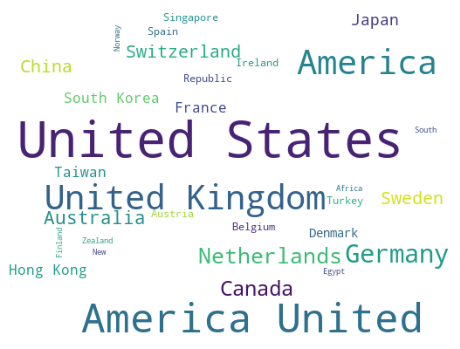

In [7]:
# Préparation des données
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

<a id="9"></a> <br>
<font color='purple'>
## 9. Box Plots

<font color='black'>    
* Median (50th percentile) = valeur moyenne de l'ensemble de données. Cette méthode permet de trier et de prendre les données au milieu. On appelle également 50% percentile, soit 50% des données sont inférieures à la médiane (50e quartile) (quartile). 

    * 25e centile : quartile 1 (Q1) qui est le quartile inférieur
    * 75e centile : quartile 3 (Q3) qui est le quartile supérieur
    * hauteur de la boîte = IQR : plage interquartile = Q3-Q1
    * Whiskers : 1,5 * IQR (par rapport aux T1 et T3)
    * Valeurs aberrantes : étant plus de 1,5 * IQR (généralement loin de la médiane).

* trace : type de trace 'box'
    * y : données que nous voulons visualiser avec le diagramme en boîte
    * marker : de type 'color'

In [8]:
# Préparation des données
x2015 = timesData[timesData.year == 2015]

trace0 = go.Box(
    y=x2015.total_score,
    name = 'score total des universités en 2015',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=x2015.research,
    name = 'recherche des université en 2015',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
iplot(data)



























<a id="10"></a> <br>
<font color='purple'>
## 10. Scatter Matrix Plots

<font color='black'>
Graphiques à matrice de dispersion¶
La matrice de dispersion met en évidence la covariance et la relation entre plus de 2 caractéristiques. 
La covariance entre deux variables aléatoires est un nombre permettant de quantifier leurs écarts conjoints par rapport à leurs espérances respectives. Elle s’utilise également pour deux séries de données numériques (écarts par rapport aux moyennes).

* import figure factory as ff
* create_scatterplotmatrix : crée un nuage de points
    * data2015 : données préparées. Il comprend la recherche, les scores internationaux et totaux avec un indice de 1 à 401.
    * colormap : carte couleur du nuage de points (scatter plot)
    * colormap_type : type de couleur du nuage de points
    * height : hauteur
    * weight : largeur

In [9]:
# import figure factory
import plotly.figure_factory as ff
# prepare data
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international", "total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

<font color='green'>
Vous pouvez notez que la légende affichée est en anglais car elle provient directement du set de données 

<a id="11"></a> <br>
<font color='purple'>
## 11. Inset Plots

<font color='black'>
Inset Matrix (Matrice d'écart) : 2 tracés sont dans une image

In [10]:
# Premier tracé
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "enseignement",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)
# Second tracé
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "transfert de connaissances",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Transfert de connaissances et enseignement par rapport au classement mondial des universités'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="12"></a> <br>
<font color='purple'>
## 12. 3D Scatter Plot with colorscaling

<font color='black'>
Diagramme de dispersion 3D

Parfois, deux dimensions pour représenter des données ne sont pas suffisante pour les interpréter. L'ajout d'une dimension supplémentaire peut être necéssaire à la compréhension de ces données. 
L'ajout d'une couleur représente la 4ème dimension.

* go.Scatter3d : créer un nuage de points 3D
* x, y, z : axe des tracés
* mode : marché dispersé
* size : taille du marqueur
* color : axe de l'échelle des couleurs
* colorscale (échelle de couleurs) : 4ème dimension

In [15]:
# Le premier tracé est une dispersion 3D
trace1 = go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z=dataframe.citations,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(230,200,100)',   # définir la couleur dans un tableau ou une liste de valeurs souhaitées     
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)


iplot(fig)


<font color='blue'>
Exercice : Vous pouvez remarquer que le diagramme de dispersion 3D ci-dessus ne contient pas de légende, en lisant le code, quel sens peut-on donner aux données ? 

<a id="13"></a> <br>
<font color='purple'>
## 13. Multiple Subplots

<font color='black'>
Plusieurs sous-tracés: lors de la comparaison de plusieurs entités, plusieurs sous-tracés peuvent être utiles.

### Exercices

<font color='blue'>
    
1. Quels sont les pays dans lesquels le score universitaire pour le transfert de connaissances se démarque ? Utiliser un ou plusieurs graphique pour justifier votre réponse.
    
2. Existe-t-il une corrélation entre le score universitaire pour le transfert de connaissances et le score universitaire des perspectives internationales (personnel, étudiants, recherche) ? Utiliser un ou plusieurs graphique pour justifier votre réponse.

3. Proposer un cas d'étude qui justifie un diagramme de dispersion 3D (en utilisant ce même jeux de données).

<font color='black'>

**Vous pouvez si vous le désirez travailler par groupe de 2 ou 3 personnes.**  


***

Nous arrivons à la fin de ce tutoriel, si vous avez besoin de changer d'environnement conda, vous pouvez taper la commande **conda** suivante :  
`conda deactivate`

***

In [5]:
#x2015 = timesData[timesData.year == 2015]


trace = go.Box(
    x = pd.to_numeric(timesData.income, errors='coerce'),
    y = timesData.country,
    name = 'score des transferts de connaissances par pays',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    ),
    orientation='h'
    
)

layout = go.Layout(
    width=1000,
    height=2000,
    
    xaxis=dict(
        title='Transfert de connaissances',
        type='linear'     
    ),
    yaxis=dict(
        title='pays'
        
    ),
    title = 'Transfert de connaissances par pays'
    
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Text(0, 0.5, 'Score moyen du revenu')

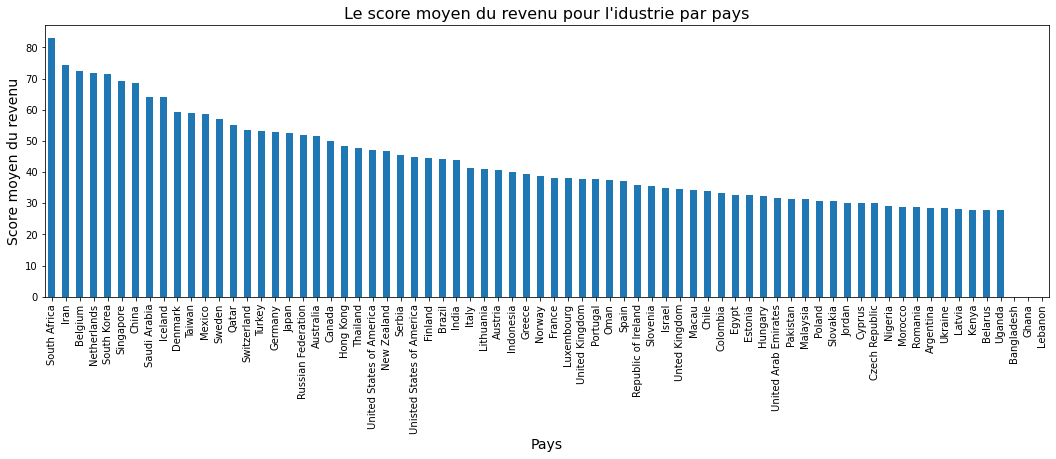

In [6]:
df = timesData.copy()
df.income = pd.to_numeric(df.income, errors='coerce')
ax = df.groupby(['country']).income.mean().sort_values(ascending=False).plot(kind='bar', figsize = (18,5))
ax.set_xlabel('Pays', fontsize=14)
ax.set_title("Le score moyen du revenu pour l'idustrie par pays",fontsize=16)
ax.set_ylabel("Score moyen du revenu", fontsize=14)

In [9]:
timesData = pd.read_csv("timesData.csv")
df = timesData.copy()
df = df.loc[:,["country","income","international"]]
df.international = pd.to_numeric(df.international, errors='coerce')
df.income = pd.to_numeric(df.income, errors='coerce')
df = df.groupby(['country']).mean()

print(df.head(10))


# Création de la trame 1
trace1 = go.Scatter(
                    x = df.country,
                    y = df.income,
                    mode = "lines+markers",
                    name = "income",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text = df.country)
# Création de la trame 2
trace2 = go.Scatter(
                    x = df.country,
                    y = df.international,
                    mode = "lines+markers",
                    name = "international",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text = df.country)

data = [trace1]#, trace2]
layout = dict(title = 'Income et international comparé par pays',
              xaxis = dict(title = 'Pays',ticklen = 5,zeroline= False)
)
fig = dict(data = data, layout = layout)
iplot(fig)

               income  international
country                             
Argentina   28.600000      28.100000
Australia   51.596552      78.347863
Austria     40.826667      76.022581
Bangladesh        NaN      37.200000
Belarus     28.000000      48.200000
Belgium     72.536111      61.354054
Brazil      44.300000      20.800000
Canada      49.829000      63.867308
Chile       33.900000      45.762500
China       68.662195      29.526829


KeyError: 'country'